In [1]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
import geopandas as gpd


# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
FILE_CSV = "csv_file.csv"
FILE_TXT = "txt_file.txt"
JSON_FILE = "json_file.json"
DATA_FOLDER = "data"

In [3]:
main_path = os.getcwd()
main_path

'/Users/biddie/Projects/Datascience/finalproject'

In [4]:
file_csvpath = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_CSV)
file_txtpath = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_TXT)
file_jsonpath = os.path.join(os.path.join(main_path, DATA_FOLDER), JSON_FILE)

In [5]:
%%time

csv_file = pd.read_csv(file_csvpath)
txt_file = pd.read_csv(file_txtpath)


CPU times: user 15.2 ms, sys: 4.89 ms, total: 20.1 ms
Wall time: 20.3 ms


In [6]:
with open(file_jsonpath) as f:
    json_file = json.load(f)

In [11]:
def load_json(file_path):
    """ Loads json file """
    try:
        with open(file_path) as f:
            json_file = json.load(f)
            return json_file
    except Exception as e:
        print(str(e))

In [12]:
json_file

[{'author': {'properties': {'friends': 150,
    'verified': False,
    'status_count': 583}},
  'location': {'longitude': -1.4496120000000003,
   'country': 'GB',
   'latitude': 53.38322877572023},
  'content': {'body': "To everyone tryin to snapchat me fuck off I'm ugly"},
  'properties': {'sentiment': -1, 'platform': 'twitter'}},
 {'author': {'properties': {'friends': 1321,
    'verified': False,
    'status_count': 86271}},
  'location': {'longitude': -4.200440999999999,
   'country': 'GB',
   'latitude': 57.786631183916356},
  'content': {'body': '@cammiescott have you ever been to Scotland? You should give Nessie a wee visit! (I live near her) #askcamscott'},
  'properties': {'sentiment': -1, 'platform': 'twitter'}},
 {'author': {'properties': {'friends': 1952,
    'verified': False,
    'status_count': 11785}},
  'location': {'longitude': -0.07060350000000003,
   'country': 'GB',
   'latitude': 51.46469310439313},
  'content': {'body': '#LoveIsland #zaraholland 😭😭😭😭 https://t.co/

In [13]:
type(json_file)

list

In [14]:
some_data = pd.DataFrame(json_file)

In [15]:
for i in json_file[0:5]:
    print(i["author"])

{'properties': {'friends': 150, 'verified': False, 'status_count': 583}}
{'properties': {'friends': 1321, 'verified': False, 'status_count': 86271}}
{'properties': {'friends': 1952, 'verified': False, 'status_count': 11785}}
{'properties': {'friends': 629, 'verified': False, 'status_count': 22813}}
{'properties': {'friends': 509, 'verified': False, 'status_count': 8740}}


In [16]:
some_data.head()

,author,location,content,properties
0,"{'properties': {'friends': 150, 'verified': False, 'status_count': 583}}","{'longitude': -1.4496120000000003, 'country': 'GB', 'latitude': 53.38322877572023}",{'body': 'To everyone tryin to snapchat me fuck off I'm ugly'},"{'sentiment': -1, 'platform': 'twitter'}"
1,"{'properties': {'friends': 1321, 'verified': False, 'status_count': 86271}}","{'longitude': -4.200440999999999, 'country': 'GB', 'latitude': 57.786631183916356}",{'body': '@cammiescott have you ever been to Scotland? You should give Nessie a wee visit! (I live near her) #askcamscott'},"{'sentiment': -1, 'platform': 'twitter'}"
2,"{'properties': {'friends': 1952, 'verified': False, 'status_count': 11785}}","{'longitude': -0.07060350000000003, 'country': 'GB', 'latitude': 51.46469310439313}",{'body': '#LoveIsland #zaraholland 😭😭😭😭 https://t.co/LUpQvshkm3'},"{'sentiment': -1, 'platform': 'twitter'}"
3,"{'properties': {'friends': 629, 'verified': False, 'status_count': 22813}}","{'longitude': -0.17311500000000005, 'country': 'GB', 'latitude': 51.5248433429905}",{'body': '😴'},"{'sentiment': 0, 'platform': 'twitter'}"
4,"{'properties': {'friends': 509, 'verified': False, 'status_count': 8740}}","{'longitude': -2.6693795, 'country': 'GB', 'latitude': 53.46992093633473}",{'body': '@sickkening Yep you're also that xx'},"{'sentiment': 1, 'platform': 'twitter'}"


In [17]:
# Use json lambda to open the dictionary
def get_author_details(text):
    
    friends = text["properties"]["friends"]
    verified = text["properties"]["verified"]
    status_count = text["properties"]["status_count"]
    
    # friends = f"{friends}"
    # verified = f"{verified}" 
    # status_count = f"{status_count}"
    
    return friends, status_count, verified

In [18]:
some_data["result"] = some_data["author"].apply(lambda x:get_author_details(x))

In [19]:
some_data.head()

,author,location,content,properties,result
0,"{'properties': {'friends': 150, 'verified': False, 'status_count': 583}}","{'longitude': -1.4496120000000003, 'country': 'GB', 'latitude': 53.38322877572023}",{'body': 'To everyone tryin to snapchat me fuck off I'm ugly'},"{'sentiment': -1, 'platform': 'twitter'}","(150, 583, False)"
1,"{'properties': {'friends': 1321, 'verified': False, 'status_count': 86271}}","{'longitude': -4.200440999999999, 'country': 'GB', 'latitude': 57.786631183916356}",{'body': '@cammiescott have you ever been to Scotland? You should give Nessie a wee visit! (I live near her) #askcamscott'},"{'sentiment': -1, 'platform': 'twitter'}","(1321, 86271, False)"
2,"{'properties': {'friends': 1952, 'verified': False, 'status_count': 11785}}","{'longitude': -0.07060350000000003, 'country': 'GB', 'latitude': 51.46469310439313}",{'body': '#LoveIsland #zaraholland 😭😭😭😭 https://t.co/LUpQvshkm3'},"{'sentiment': -1, 'platform': 'twitter'}","(1952, 11785, False)"
3,"{'properties': {'friends': 629, 'verified': False, 'status_count': 22813}}","{'longitude': -0.17311500000000005, 'country': 'GB', 'latitude': 51.5248433429905}",{'body': '😴'},"{'sentiment': 0, 'platform': 'twitter'}","(629, 22813, False)"
4,"{'properties': {'friends': 509, 'verified': False, 'status_count': 8740}}","{'longitude': -2.6693795, 'country': 'GB', 'latitude': 53.46992093633473}",{'body': '@sickkening Yep you're also that xx'},"{'sentiment': 1, 'platform': 'twitter'}","(509, 8740, False)"


In [20]:
jsondata = pd.json_normalize(json_file)

In [21]:
jsondata.head()

,author.properties.friends,author.properties.verified,author.properties.status_count,location.longitude,location.country,location.latitude,content.body,properties.sentiment,properties.platform
0,150,False,583,-1.45,GB,53.38,To everyone tryin to snapchat me fuck off I'm ugly,-1,twitter
1,1321,False,86271,-4.20,GB,57.79,@cammiescott have you ever been to Scotland? You should give Nessie a wee visit! (I live near her) #askcamscott,-1,twitter
2,1952,False,11785,-0.07,GB,51.46,#LoveIsland #zaraholland 😭😭😭😭 https://t.co/LUpQvshkm3,-1,twitter
3,629,False,22813,-0.17,GB,51.52,😴,0,twitter
4,509,False,8740,-2.67,GB,53.47,@sickkening Yep you're also that xx,1,twitter


In [22]:
jsondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author.properties.friends       1000 non-null   int64  
 1   author.properties.verified      1000 non-null   bool   
 2   author.properties.status_count  1000 non-null   int64  
 3   location.longitude              1000 non-null   float64
 4   location.country                1000 non-null   object 
 5   location.latitude               1000 non-null   float64
 6   content.body                    1000 non-null   object 
 7   properties.sentiment            1000 non-null   int64  
 8   properties.platform             1000 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 63.6+ KB


In [23]:
txt_file

,author.properties.friends,author.properties.verified,location.longitude,author.properties.status_count,properties.sentiment,location.latitude,location.country,content.body,properties.platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter
2,169,False,-0.28,1185.00,-1.00,51.39,GB,i think she'd Understand but there's like Nothing she can do,twitter
3,195,False,0.03,2742.00,-1.00,51.39,GB,@SoccerSix #SoccerSixNashGrier pleassssssseeeeeee 🙋🏼🙋🏼🙋🏼🙋🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼,twitter
4,572,False,-0.09,18332.00,0.00,51.36,GB,@GraceLazard 💖,twitter
5,727,False,-0.18,5572.00,0.00,51.36,GB,All I want is for my @JeffreeStar order to arrive 😭😩,twitter
6,2454,False,-0.06,12466.00,0.00,51.55,GB,My #TeenChoice #ChoiceSongMaleArtist is PILLOWTALK by @zaynmalik https://t.co/RgTKC5VJYW,twitter
7,94505,False,-2.32,40455.00,1.00,51.23,GB,The day to day loneliness is real,twitter
8,1047,False,-4.24,16090.00,-1.00,55.86,GB,@JulietteLewis :hugs:,twitter
9,599,False,1.09,33251.00,-1.00,51.28,GB,@bxstock there's a reason his @ is literally Paedrophile,twitter


In [24]:
csv_file

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566,False,Can't believe I'm missing Love Island 😩,GB,twitter,1,51.57,0.46
1,114,1377,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1,52.97,-1.17
2,568,8375,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1,51.39,0.03
3,1845,19394,False,...even better if time travel were invented and I could go there back in 1876 and have a whiskey with Al #Deadwood,GB,twitter,-1,51.65,-3.80
4,1617,17922,False,@GreenAlty @ShakeyStephens My Mum in mid 80s pushed into road by Black migrants 2 sons with disabilities attacked robbed U THINK WE NEED MOR,GB,twitter,0,53.54,-2.65
5,908,97118,False,@sarahann_jones @heatherpeace @seachell74 @HP_Community @cocacolagirl35 factor 30 this year lesson learnt tee hee X,GB,twitter,-1,50.84,-0.13
6,294,29373,False,Folk at level 12 running around in Reaper mariachi skins and I'm level 30 with FUCK AW,GB,twitter,1,55.47,-4.62
7,188,890,False,Just want money so I can move away 😩,GB,twitter,-1,52.80,-0.84
8,783,32215,False,"@Ray1Moses @Cornerstone_HQ Rice flour then. Doesn't have the same effect yelling ""Self-raising"" . People just think you're mad .",GB,twitter,0,57.59,-4.53
9,96,43578,False,عجزت عيوني على غيرك تمون، ماعرفت انطق لغيرك بالسلام💕.,GB,twitter,0,51.52,-0.17


In [26]:
json_txt_data = pd.concat([txt_file, jsondata], ignore_index=True)

In [27]:
json_txt_data.head()

,author.properties.friends,author.properties.verified,location.longitude,author.properties.status_count,properties.sentiment,location.latitude,location.country,content.body,properties.platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter
2,169,False,-0.28,1185.00,-1.00,51.39,GB,i think she'd Understand but there's like Nothing she can do,twitter
3,195,False,0.03,2742.00,-1.00,51.39,GB,@SoccerSix #SoccerSixNashGrier pleassssssseeeeeee 🙋🏼🙋🏼🙋🏼🙋🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼,twitter
4,572,False,-0.09,18332.00,0.00,51.36,GB,@GraceLazard 💖,twitter


In [28]:
jsondata.shape

(1000, 9)

In [29]:
txt_file.shape

(1000, 9)

In [30]:
json_txt_data.shape

(2000, 9)

In [31]:
json_txt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author.properties.friends       2000 non-null   object 
 1   author.properties.verified      2000 non-null   object 
 2   location.longitude              1999 non-null   float64
 3   author.properties.status_count  1999 non-null   float64
 4   properties.sentiment            1999 non-null   float64
 5   location.latitude               1999 non-null   float64
 6   location.country                1999 non-null   object 
 7   content.body                    1999 non-null   object 
 8   properties.platform             1998 non-null   object 
dtypes: float64(4), object(5)
memory usage: 140.8+ KB


In [32]:
json_txt_csv_data = pd.concat([json_txt_data, csv_file], ignore_index=True)

In [33]:
json_txt_csv_data.head()

,author.properties.friends,author.properties.verified,location.longitude,author.properties.status_count,properties.sentiment,location.latitude,location.country,content.body,properties.platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter
2,169,False,-0.28,1185.00,-1.00,51.39,GB,i think she'd Understand but there's like Nothing she can do,twitter
3,195,False,0.03,2742.00,-1.00,51.39,GB,@SoccerSix #SoccerSixNashGrier pleassssssseeeeeee 🙋🏼🙋🏼🙋🏼🙋🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼,twitter
4,572,False,-0.09,18332.00,0.00,51.36,GB,@GraceLazard 💖,twitter


In [34]:
json_txt_csv_data.shape

(3000, 9)

In [35]:
author_data = json_txt_csv_data

In [36]:
author_data.head()

,author.properties.friends,author.properties.verified,location.longitude,author.properties.status_count,properties.sentiment,location.latitude,location.country,content.body,properties.platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter
2,169,False,-0.28,1185.00,-1.00,51.39,GB,i think she'd Understand but there's like Nothing she can do,twitter
3,195,False,0.03,2742.00,-1.00,51.39,GB,@SoccerSix #SoccerSixNashGrier pleassssssseeeeeee 🙋🏼🙋🏼🙋🏼🙋🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼,twitter
4,572,False,-0.09,18332.00,0.00,51.36,GB,@GraceLazard 💖,twitter


In [37]:
author_data.columns

Index(['author.properties.friends', 'author.properties.verified',
       'location.longitude', 'author.properties.status_count',
       'properties.sentiment', 'location.latitude', 'location.country',
       'content.body', 'properties.platform'],
      dtype='object')

In [38]:
author_data.rename(
    columns = {
        
        'author.properties.friends':'friends',
        'author.properties.verified':'verified',
        'properties.sentiment':'sentiment',
        'location.longitude':'longitude',
        'location.latitude':'latitude',
        'author.properties.status_count':'status_count',
        'location.country':'country',
        'content.body':'tweet',
        'properties.platform':'platform'
        
    }, inplace = True)


In [39]:
author_data["sentiment"].unique()

array([ 0., -1.,  1., nan])

In [40]:
author_data.columns

Index(['friends', 'verified', 'longitude', 'status_count', 'sentiment',
       'latitude', 'country', 'tweet', 'platform'],
      dtype='object')

In [41]:
author_data.head()

,friends,verified,longitude,status_count,sentiment,latitude,country,tweet,platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter
2,169,False,-0.28,1185.00,-1.00,51.39,GB,i think she'd Understand but there's like Nothing she can do,twitter
3,195,False,0.03,2742.00,-1.00,51.39,GB,@SoccerSix #SoccerSixNashGrier pleassssssseeeeeee 🙋🏼🙋🏼🙋🏼🙋🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼,twitter
4,572,False,-0.09,18332.00,0.00,51.36,GB,@GraceLazard 💖,twitter


# Exploratory Data Analysis

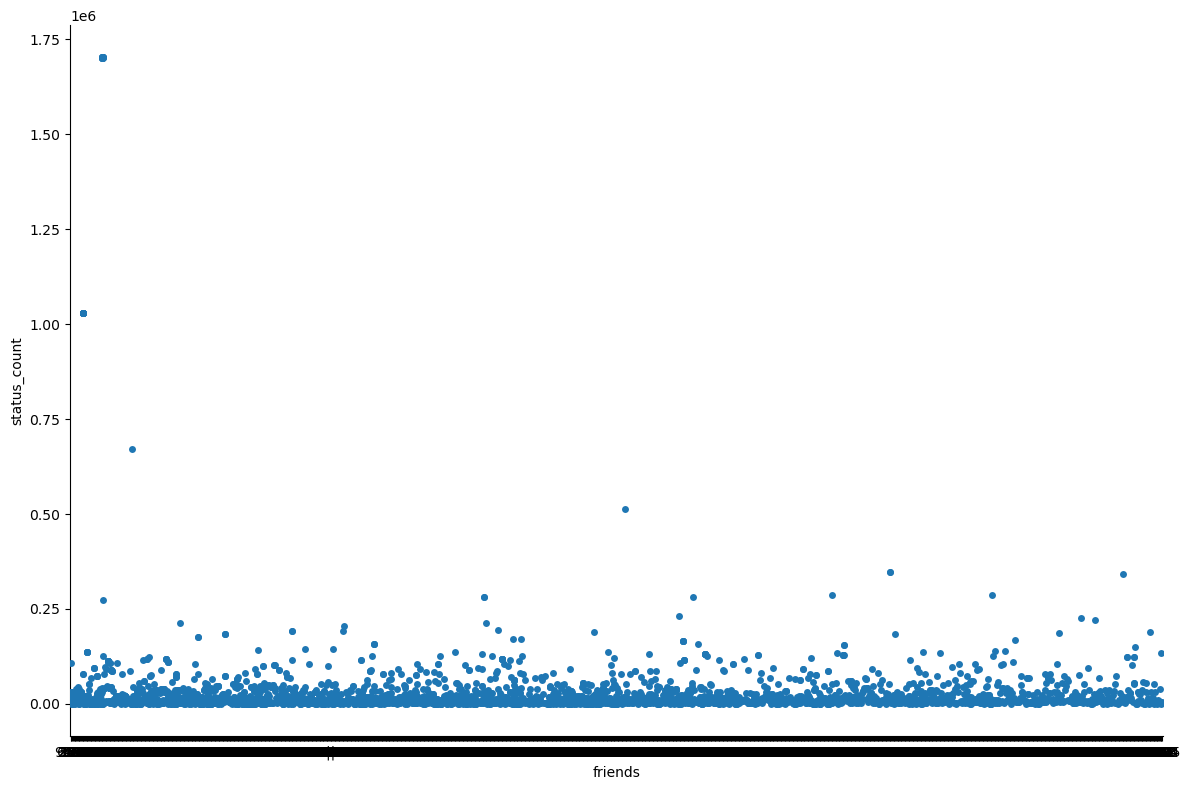

In [42]:
sns.catplot(x='friends', y='status_count', data=author_data, height=8, aspect=12/8)

<Axes: >

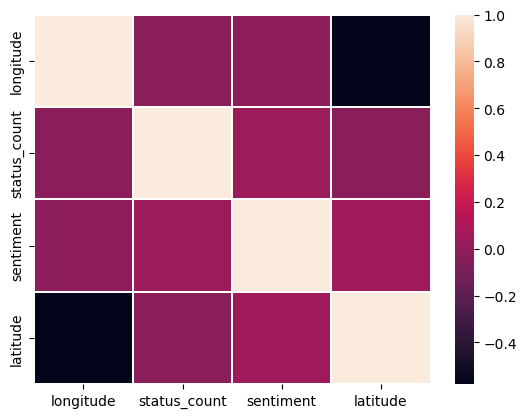

In [43]:
sns.heatmap(author_data.corr(), cbar = True, linewidths = 0.3)

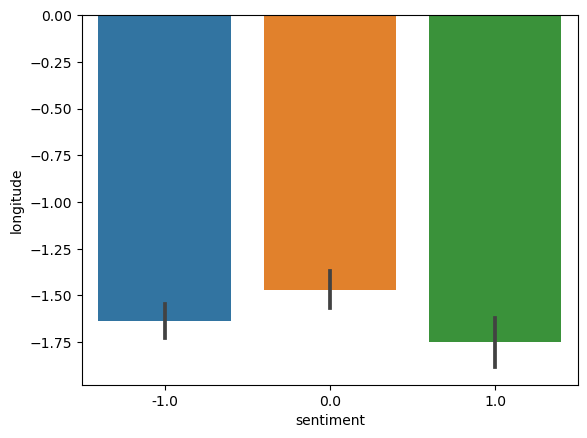

In [44]:
sns.barplot(data=author_data, y="longitude", x = "sentiment")
plt.show()

In [45]:
author_data.isnull().sum()

friends         0
verified        0
longitude       1
status_count    1
sentiment       1
latitude        1
country         1
tweet           1
platform        2
dtype: int64

In [46]:
author_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   friends       3000 non-null   object 
 1   verified      3000 non-null   object 
 2   longitude     2999 non-null   float64
 3   status_count  2999 non-null   float64
 4   sentiment     2999 non-null   float64
 5   latitude      2999 non-null   float64
 6   country       2999 non-null   object 
 7   tweet         2999 non-null   object 
 8   platform      2998 non-null   object 
dtypes: float64(4), object(5)
memory usage: 211.1+ KB


In [47]:
# author_data["friends"].value_counts().to_frame()

In [48]:
author_data[author_data["friends"] == '|| TELL ME YOUR NAME! XD']

,friends,verified,longitude,status_count,sentiment,latitude,country,tweet,platform
552,|| TELL ME YOUR NAME! XD,twitter,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
author_data_new = author_data.dropna()

In [50]:
author_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   friends       2998 non-null   object 
 1   verified      2998 non-null   object 
 2   longitude     2998 non-null   float64
 3   status_count  2998 non-null   float64
 4   sentiment     2998 non-null   float64
 5   latitude      2998 non-null   float64
 6   country       2998 non-null   object 
 7   tweet         2998 non-null   object 
 8   platform      2998 non-null   object 
dtypes: float64(4), object(5)
memory usage: 234.2+ KB


In [51]:
author_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   friends       2998 non-null   object 
 1   verified      2998 non-null   object 
 2   longitude     2998 non-null   float64
 3   status_count  2998 non-null   float64
 4   sentiment     2998 non-null   float64
 5   latitude      2998 non-null   float64
 6   country       2998 non-null   object 
 7   tweet         2998 non-null   object 
 8   platform      2998 non-null   object 
dtypes: float64(4), object(5)
memory usage: 234.2+ KB


In [52]:
type(author_data_new)

pandas.core.frame.DataFrame

In [53]:
author_data_new.to_csv('author_data_new.csv', index=False)

In [54]:
author_data_new.isnull().sum()

friends         0
verified        0
longitude       0
status_count    0
sentiment       0
latitude        0
country         0
tweet           0
platform        0
dtype: int64

In [48]:
author_data_new.head()

,friends,verified,longitude,status_count,sentiment,latitude,country,tweet,platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter
2,169,False,-0.28,1185.00,-1.00,51.39,GB,i think she'd Understand but there's like Nothing she can do,twitter
3,195,False,0.03,2742.00,-1.00,51.39,GB,@SoccerSix #SoccerSixNashGrier pleassssssseeeeeee 🙋🏼🙋🏼🙋🏼🙋🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼,twitter
4,572,False,-0.09,18332.00,0.00,51.36,GB,@GraceLazard 💖,twitter


In [49]:
author_data_new["friends"] = author_data_new["friends"].astype(int)

/var/folders/21/11z2b6q1515fq478jyzx4qv00000gn/T/ipykernel_9412/980284434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data_new["friends"] = author_data_new["friends"].astype(int)


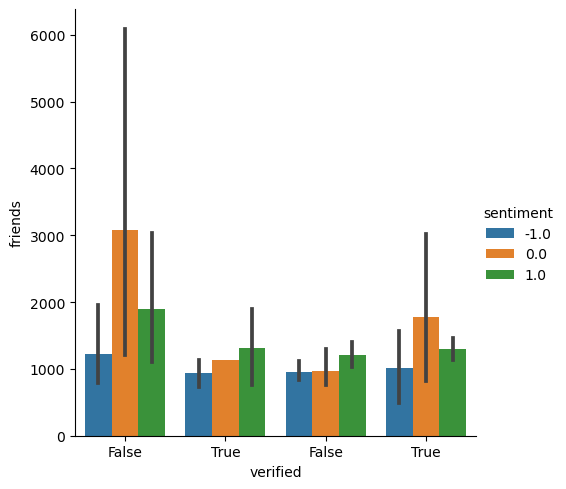

In [50]:
sns.catplot(data=author_data_new, kind="bar", x="verified", y="friends", hue="sentiment")

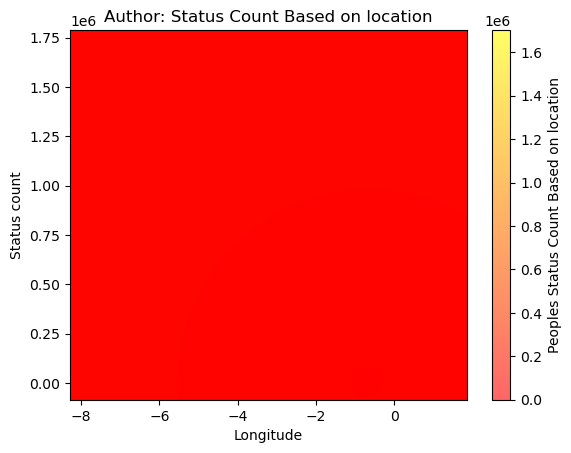

In [51]:
# From GeoPandas, our world map data
#worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Creating axes and plotting world map
#fig, ax = plt.subplots(figsize=(12, 6))
#author_data.plot(color="lightgrey", ax=ax)

# Plotting our Impact Energy data with a color map
x = author_data['longitude']
y = author_data['status_count']
z = author_data['status_count']
plt.scatter(x, y, s=20*z, c=z, alpha=0.6, vmin=0,cmap='autumn')
#plt.scatter(x, y, s = 10, c = 'red', marker = 'o', alpha = 1, cmap='autumn')


plt.colorbar(label='Peoples Status Count Based on location')

# Creating axis limits and title
#plt.xlim([-180, 180])
#plt.ylim([-90, 90])

plt.title("Author: Status Count Based on location")
plt.xlabel("Longitude")
plt.ylabel("Status count")
plt.show()

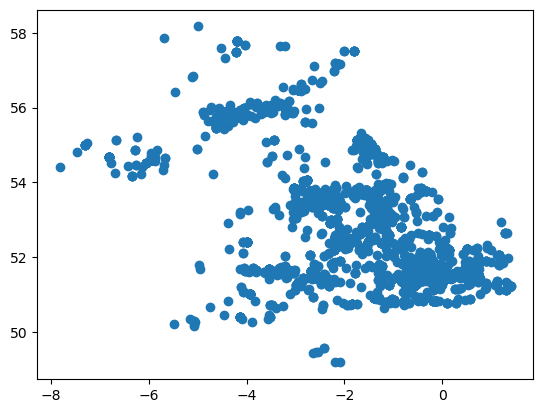

In [52]:
#import matplotlib.pyplot as plt
plt.scatter(x=author_data['longitude'], y=author_data['latitude'])
plt.savefig("images/location.png")
plt.show()

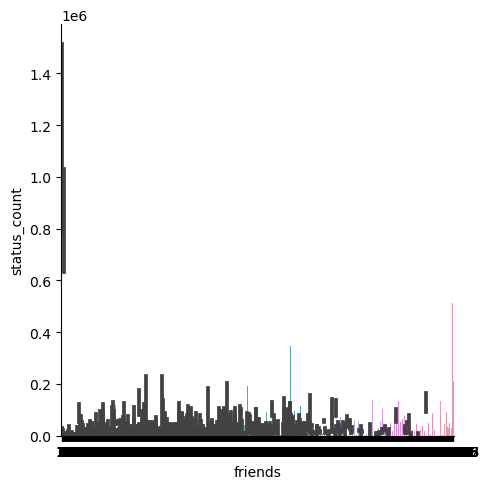

In [53]:
sns.catplot(data=author_data_new, kind="bar", x="friends", y="status_count")
plt.savefig("images/status of friends.png")

# Modelling

In [54]:
author_data_new.columns

Index(['friends', 'verified', 'longitude', 'status_count', 'sentiment',
       'latitude', 'country', 'tweet', 'platform'],
      dtype='object')

In [55]:
author_data_new.shape

(2998, 9)

In [56]:
author_data_new.head()

,friends,verified,longitude,status_count,sentiment,latitude,country,tweet,platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter
2,169,False,-0.28,1185.00,-1.00,51.39,GB,i think she'd Understand but there's like Nothing she can do,twitter
3,195,False,0.03,2742.00,-1.00,51.39,GB,@SoccerSix #SoccerSixNashGrier pleassssssseeeeeee 🙋🏼🙋🏼🙋🏼🙋🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼,twitter
4,572,False,-0.09,18332.00,0.00,51.36,GB,@GraceLazard 💖,twitter


In [57]:
author_data_new.to_csv('Author_data.csv',sep='\t')

In [58]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

In [59]:
train_data, test_data = train_test_split(author_data_new, test_size=0.33, random_state=42)


In [60]:
train_data.shape, test_data.shape

((2008, 9), (990, 9))

In [61]:
train_data.head()

,friends,verified,longitude,status_count,sentiment,latitude,country,tweet,platform
406,413,True,-4.24,11819.00,1.00,55.86,GB,@CJMcFadden Can't beat a hiking trip with a banana guard.,twitter
2730,1269,False,-3.93,1764.00,-1.00,51.02,GB,@LoveIsland talk about having issues.dan has issues. You only just met!!!! Olivia miss great Britain =bunny boiler #love island #issueisland,twitter
2093,606,False,-3.51,5211.00,-1.00,55.87,GB,@Lewis27Russell nah ur alright,twitter
1507,1300,False,-2.01,28031.00,0.00,57.52,GB,@BolsoverBeast https://t.co/vo4CrD9eC1,twitter
2794,1966,False,-1.03,6038.00,0.00,50.88,GB,🙊🙈,twitter


In [62]:
test_data.head()

,friends,verified,longitude,status_count,sentiment,latitude,country,tweet,platform
1378,519,False,-1.53,27980.00,-1.00,54.90,GB,She is literally goals 😍😍😍😍😍😍😍 https://t.co/vxuxMqBvKm,twitter
934,166,False,-2.16,2765.00,0.00,52.26,GB,Casually sliding around Alice's floor as a preferred mode of transport,twitter
144,2454,False,-0.06,12452.00,0.00,51.55,GB,My #TeenChoice #ChoiceMaleArtist is @zaynmalik 😍🎤❤️👑 https://t.co/xItWgY9zs6,twitter
1754,2833,False,-0.25,82132.00,-1.00,51.40,GB,@JamesDeen You might have to answer a few questions as people are accusing you of Amber Rayne's death.,twitter
51,1877,False,-4.89,7161.00,-1.00,55.89,GB,this!! https://t.co/BpyTfTrU3b,twitter


In [ ]:
%%time

save_path = 'artefacts/models_regression_friends'
time_limit = 60
TARGET = "friends"

predictor = TabularPredictor(label=TARGET, path=save_path).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "artefacts/models_regression_friends/"
AutoGluon Version:  0.7.0
Python Version:     3.8.16
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 22.4.0: Mon Mar  6 20:59:28 PST 2023; root:xnu-8796.101.5~3/RELEASE_ARM64_T6000
Train Data Rows:    2008
Train Data Columns: 8
Label Column: friends
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (333028, 0, 1302.76693, 8783.50798)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1450.14 MB
	Train Data (Origina

In [ ]:
%%time

save_path = 'artefacts/models_regression_statuscount'
time_limit = 60
TARGET = "status_count"

predictor = TabularPredictor(label=TARGET, path=save_path).fit(train_data, time_limit=time_limit)

In [ ]:
from autogluon.multimodal import MultiModalPredictor


In [ ]:
predictor.fit_summary()